In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
import numpy as np
import cv2
import os
import pickle
import math
import tqdm
from tqdm import trange
from matplotlib import pyplot as plt

In [18]:
# data process 提取資料
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

#Douban_user_book = pd.read_csv('./Data/Douban Book/user_book.dat', sep="\t", names =('user','item','rank'))

In [19]:
train.shape

(2528, 2)

In [20]:
def readpic(p):
    #return mpimg.imread(p)
    return cv2.imread(p)

def showpic(pic):
    plt.imshow(pic)
    plt.show()

def more_showpic(pic_list):
    fig,ax = plt.subplots(1,5,figsize = (15,3))
    for idx, vactor in enumerate(pic_list[:5]):
        #ax[idx].imshow(vactor)
        ax[idx].imshow(cv2.cvtColor(vactor, cv2.COLOR_BGR2RGB))

In [21]:
#train image
train_img = []
train_img_label = []
for ID, Label in train.iloc:
    train_img.append(readpic('./Data/train_images/'+ID))
    train_img_label.append(Label)

#test image     
test_img = []
test_img_label = []
for ID, Label in test.iloc:
    test_img.append(readpic('./Data/test_images/'+ID))
    test_img_label.append(Label)

In [22]:
len(train_img_label)

2528

In [23]:
valid_img = train_img[2000:]
train_img = train_img[0:2000]
valid_img_label = train_img_label[2000:]
train_img_label = train_img_label[0:2000]

In [24]:
len(train_img),len(valid_img_label)

(2000, 528)

In [25]:
train_img_label[0:10]

[0, 1, 1, 5, 5, 5, 3, 0, 3, 5]

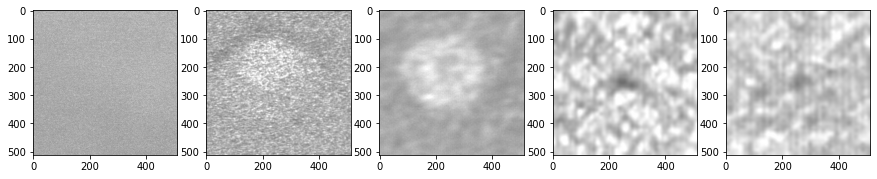

In [26]:
more_showpic(train_img[0:10])

In [27]:
train_img_label = np.array(train_img_label).astype('int64')
valid_img_label = np.array(valid_img_label).astype('int64')
test_img_label = np.array(test_img_label).astype('int64')

In [28]:
train = {'train_data':train_img, 'train_label':train_img_label}
valid = {'valid_data':valid_img, 'valid_label':valid_img_label}
test = {'test_data':test_img, 'test_label':test_img_label}

In [29]:
with open('./Data/train_data.pickle', 'wb') as f:
    pickle.dump(train, f)
with open('./Data/valid_data.pickle', 'wb') as f:
    pickle.dump(valid, f)
with open('./Data/test_data.pickle', 'wb') as f:
    pickle.dump(test, f)

In [30]:
with open('./Data/train_data.pickle', 'rb') as f :
    train = pickle.load(f)
with open('./Data/valid_data.pickle', 'rb') as f :
    valid = pickle.load(f)
with open('./Data/test_data.pickle', 'rb') as f :
    test = pickle.load(f)

In [31]:
X_train = train['train_data']
Y_train = train['train_label']
X_val = valid['valid_data']
Y_val = valid['valid_label']
X_test = test['test_data']
Y_test = test['test_label']